In [1]:
import pandas as pd
import matplotlib as mlt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("GSE76896_ALL.csv")

In [3]:
data.head()

,n,g_id,g_exo,status,sample,cohort
0,1,1007_s_at<->DDR1 /// MIR4640,11.525486,T2D,GSM2040049,organ donor
1,2,1007_s_at<->DDR1 /// MIR4640,12.065558,T2D,GSM2040050,organ donor
2,3,1007_s_at<->DDR1 /// MIR4640,12.241492,ND,GSM2040051,organ donor
3,4,1007_s_at<->DDR1 /// MIR4640,12.136862,ND,GSM2040052,organ donor
4,5,1007_s_at<->DDR1 /// MIR4640,11.877510,T2D,GSM2040053,organ donor


In [7]:
data["g_id"].value_counts().shape

(31569,)

In [4]:
# concat
data['label'] = data['status'] + '-' + data['cohort']

In [10]:
def label_maker(x):
    if x == 'ND-organ donor':
        return 1
    elif x == 'ND-partially pancreatectomized patient':
        return 2
    elif x == 'T2D-organ donor':
        return 3
    elif x == 'T2D-partially pancreatectomized patient':
        return 4
    
    

In [11]:
data['label'].value_counts()
data['y'] = data['label'].apply(label_maker)
data.head()

,n,g_id,g_exo,status,sample,cohort,label,y
0,1,1007_s_at<->DDR1 /// MIR4640,11.525486,T2D,GSM2040049,organ donor,T2D-organ donor,3
1,2,1007_s_at<->DDR1 /// MIR4640,12.065558,T2D,GSM2040050,organ donor,T2D-organ donor,3
2,3,1007_s_at<->DDR1 /// MIR4640,12.241492,ND,GSM2040051,organ donor,ND-organ donor,1
3,4,1007_s_at<->DDR1 /// MIR4640,12.136862,ND,GSM2040052,organ donor,ND-organ donor,1
4,5,1007_s_at<->DDR1 /// MIR4640,11.877510,T2D,GSM2040053,organ donor,T2D-organ donor,3


In [139]:
# sample_df=data[data["sample"].isin(["GSM2040049","GSM2040050","GSM2040051","GSM2040052","GSM2040053"])]

In [12]:
data.shape

(5398299, 8)

In [25]:
# sdfp =sample_df.pivot(index='g_id', columns='sample', values='g_exo')
sdfp = data.pivot(index=['sample','y'], columns='g_id', values='g_exo')

In [26]:
sdfp=sdfp.reset_index()

In [27]:
sdfp=sdfp.set_index('sample')
sdfp

g_id,y,1007_s_at<->DDR1 /// MIR4640,1053_at<->RFC2,117_at<->HSPA6,121_at<->PAX8,1294_at<->MIR5193 /// UBA7,1316_at<->THRA,1320_at<->PTPN21,1431_at<->CYP2E1,1487_at<->ESRRA,...,AFFX-hum_alu_at<->nan,AFFX-r2-Ec-bioB-3_at<->nan,AFFX-r2-Ec-bioB-5_at<->nan,AFFX-r2-Ec-bioB-M_at<->nan,AFFX-r2-Ec-bioC-3_at<->nan,AFFX-r2-Ec-bioC-5_at<->nan,AFFX-r2-Ec-bioD-3_at<->nan,AFFX-r2-Ec-bioD-5_at<->nan,AFFX-r2-P1-cre-3_at<->nan,AFFX-r2-P1-cre-5_at<->nan
sample,,,,,,,,,,,,,,,,,,,,,
GSM2040049,3,11.525486,8.228068,6.263650,6.980316,6.935224,7.202693,6.506303,NaN,10.174487,...,14.078262,10.772023,10.852723,11.217815,11.616385,11.642031,13.380980,13.285054,14.849882,14.745887
GSM2040050,3,12.065558,7.846811,6.209375,6.845665,7.756955,7.296280,6.260816,NaN,9.603659,...,14.047539,10.772366,10.848230,11.281313,11.658053,11.718157,13.528923,13.426079,14.921518,14.755227
GSM2040051,1,12.241492,8.773813,6.224915,8.470868,7.273758,6.501721,6.037350,NaN,9.910506,...,14.051806,11.265547,11.348677,11.750596,12.044968,12.141476,13.691652,13.567323,14.939526,14.798012
GSM2040052,1,12.136862,8.154033,6.337771,7.077127,7.714096,6.339736,6.060582,NaN,9.729527,...,14.095301,10.880691,10.897250,11.340090,11.619211,11.731085,13.444031,13.337528,14.909008,14.772268
GSM2040053,3,11.877510,7.924744,7.105535,6.719634,7.643372,7.169077,5.900463,NaN,9.512516,...,14.219794,10.685269,10.737175,11.099915,11.462614,11.524764,13.439188,13.247819,14.866888,14.736428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM2040249,4,12.383049,7.247679,6.979687,6.904048,7.480060,6.542484,NaN,6.147186,8.480218,...,14.350082,11.346604,11.408714,11.829293,12.136834,12.223250,13.937784,13.790395,14.968515,14.880854
GSM2040251,4,11.776944,7.831067,6.937082,6.068158,8.104979,7.600857,NaN,6.042489,8.351191,...,14.206567,11.234402,11.295581,11.751644,12.035595,12.154590,13.811555,13.716492,15.007170,14.887732
GSM2040252,4,12.270051,7.759707,5.967218,7.260020,7.954374,7.120392,NaN,6.809104,8.765270,...,14.157174,11.351615,11.420535,11.802580,12.180390,12.326884,13.701578,13.582518,14.913773,14.778234


In [28]:
# sdfp.describe()

In [166]:
sdfp.isna().count()

sample
GSM2040049    31569
GSM2040050    31569
GSM2040051    31569
GSM2040052    31569
GSM2040053    31569
              ...  
GSM2040249    31569
GSM2040251    31569
GSM2040252    31569
GSM2040253    31569
GSM2040254    31569
Length: 171, dtype: int64

In [29]:
from sklearn import preprocessing

# x1 = sdfp.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x1_scaled = min_max_scaler.fit_transform(x1)
# df1 = pd.DataFrame(x1_scaled)

In [30]:
x1 = sdfp.values #returns a numpy array
sd_scaler = preprocessing.StandardScaler()
x1_scaled = sd_scaler.fit_transform(x1)
df1 = pd.DataFrame(x1_scaled)

In [31]:
df1=df1.fillna(df1.mean())

In [32]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [33]:
X=df1.values.tolist()

In [34]:
X1=np.array(X)
X1

array([[ 0.79845304, -2.63527509,  0.43503437, ..., -1.05656596,
        -1.15435298, -0.8421814 ],
       [ 0.79845304, -0.4846266 , -0.66401282, ..., -0.36801847,
        -0.13794046, -0.7109639 ],
       [-0.86661367,  0.21596692,  2.00824506, ...,  0.32160078,
         0.1175674 , -0.10986556],
       ...,
       [ 1.6309864 ,  0.329691  , -0.91510513, ...,  0.39579012,
        -0.24783932, -0.3877309 ],
       [ 1.6309864 ,  2.54165606, -1.05844381, ...,  1.70748618,
         0.40840426,  0.80945562],
       [ 1.6309864 ,  0.53086281, -1.45269672, ...,  0.93653818,
         0.99807241,  1.05402588]])

In [38]:
y=sdfp['y']

In [39]:
y1=np.array(y)
y1

array([3, 3, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 2, 2, 2, 4, 2,
       2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4,
       4, 4, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 2, 2, 2, 4, 4, 4, 2, 2, 2, 2,
       4, 4, 4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4])

In [40]:
y1.dtype

dtype('int64')

In [49]:
#pca
pca = PCA(n_components=3)

In [50]:
X1_r = pca.fit(X1).transform(X1)
X1_r

array([[ 1.60453175e+02,  6.25187022e+01,  3.29845030e+01],
       [ 7.73205017e+01, -2.22450696e+01,  3.70613938e+01],
       [ 1.16951177e+02,  8.13931946e+01, -8.03110564e+01],
       [ 1.03007613e+02,  1.72600540e+00,  2.10939127e+01],
       [ 9.88195290e+01, -2.36479678e+01,  6.71605391e+01],
       [ 3.26952919e+01, -6.74353368e+01, -2.00747207e+01],
       [ 1.21054883e+02,  3.74500926e+01, -3.79360397e+01],
       [ 8.57488822e+01, -5.29642532e+01,  1.89186881e+01],
       [ 7.64488974e+01, -5.06386258e+01,  5.89801033e+00],
       [ 1.13118712e+02,  1.11600824e+02, -7.40363619e+01],
       [ 1.15044722e+02,  1.34029207e+01,  8.14055024e-01],
       [ 6.83630725e+01, -7.57515146e+01,  3.41559446e+00],
       [ 1.39820166e+01, -1.64845206e+01, -6.47615803e+01],
       [ 6.98504221e+01, -3.90270403e+01,  1.01189666e+01],
       [ 7.32974772e+01, -2.40307785e+01,  2.74448229e+01],
       [ 3.84077336e+01, -6.63302801e+01,  4.40810866e+01],
       [ 9.93083529e+01,  1.16178613e+02

In [51]:
# alternative method

# lda = LinearDiscriminantAnalysis(n_components=2)
# X1_r2 = lda.fit(X1, y1).transform(X1)

In [52]:
# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [0.32626439 0.06684023 0.05620828]


Text(0.5, 0.92, 'PCA of gene expression dataset')

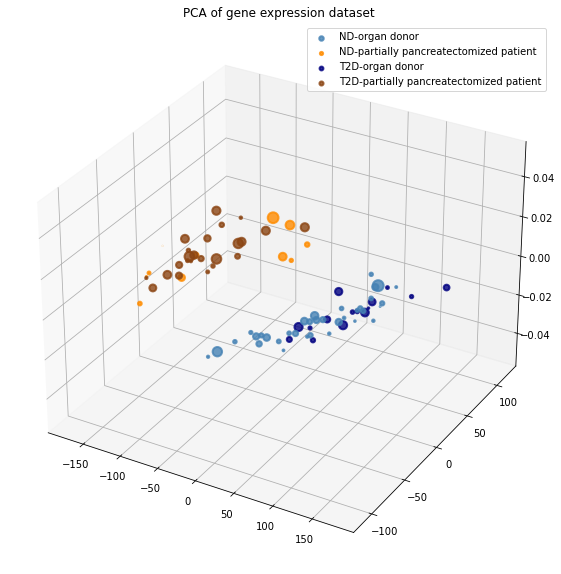

In [120]:
plt.figure(figsize=(16,10)).gca(projection='3d')
colors = ['steelblue', 'darkorange', 'navy','saddlebrown']
target_names = ['ND-organ donor','ND-partially pancreatectomized patient',
     'T2D-organ donor','T2D-partially pancreatectomized patient']
lw = 2
for color, i ,target_name in zip(colors, [1, 2, 3,4],target_names):
    plt.scatter(X1_r[y1 == i, 0], X1_r[y1 == i, 1],X1_r[y1 == i, 2], color=color, alpha=.8, lw=lw ,
               label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of gene expression dataset')

# plt.scatter(X1_r[:50,0],X1_r[:50,1],color='navy', alpha=.4, lw=lw)

In [68]:
def label_decoder(x):
    if x == 1:
        return 'ND-organ donor'
    elif x == 2:
        return 'ND-partially pancreatectomized patient'
    elif x == 3:
        return 'T2D-organ donor'
    elif x == 4:
        return 'T2D-partially pancreatectomized patient'

In [69]:
import plotly.express as px
dd = pd.DataFrame(X1_r)


dd['y'] = y1
dd['names'] = dd['y'].apply(label_decoder)
dd
fig = px.scatter_3d(dd,x=0 ,y=1, z=2,
              color='names')

fig.show()

In [61]:
python -m pip install plotly

     |████████████████████████████████| 13.2 MB 1.3 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=94c13f303dc23231a04465e8c26d6f7f7859df81deeb574bb06319d7fe4d12db
  Stored in directory: /Users/hasaniperera/Library/Caches/pip/wheels/c4/a7/48/0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying
